In [36]:
import pandas as pd 
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import glob

In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
from utils import *
from vocab import *

In [39]:
import glob
import os 
from pathlib import Path


DATA_PATH = Path('./data')

if not DATA_PATH.exists():
    DATA_PATH.mkdir(parents=True, exist_ok=True)

CACHE_FILES = glob.glob('./trace/**/cache_*', recursive=True)

DELTAS_PATH = DATA_PATH / 'e_lstm/deltas'

if not os.path.exists(DELTAS_PATH):
    print("generating deltas")
    deltas = generate_deltas(DELTAS_PATH, cache_files=CACHE_FILES)
else:
    deltas = load_deltas(DELTAS_PATH)


DELTA_COUNTS_PATH = DATA_PATH / 'e_lstm/delta_counts.csv'

if not os.path.exists(DELTA_COUNTS_PATH):
    print("generating delta counts")
    delta_counts = generate_delta_counts(deltas, DELTA_COUNTS_PATH)
else:
    delta_counts = load_series(DELTA_COUNTS_PATH)


ADDRESS_COUNTS_PATH = DATA_PATH / 'address_counts.csv'

if not os.path.exists(ADDRESS_COUNTS_PATH):
    print("generating address counts")
    address_counts = generate_address_counts(ADDRESS_COUNTS_PATH, CACHE_FILES)
else:
    address_counts = load_series(ADDRESS_COUNTS_PATH)


In [40]:
print(sum(delta_counts))
delta_counts.describe()

426240


count    246657.000000
mean          1.728068
std         186.506830
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max       90155.000000
Name: 1, dtype: float64

In [41]:
print(sum(address_counts))
address_counts.describe()

426770


count    367891.000000
mean          1.160045
std           0.652192
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         261.000000
Name: 1, dtype: float64

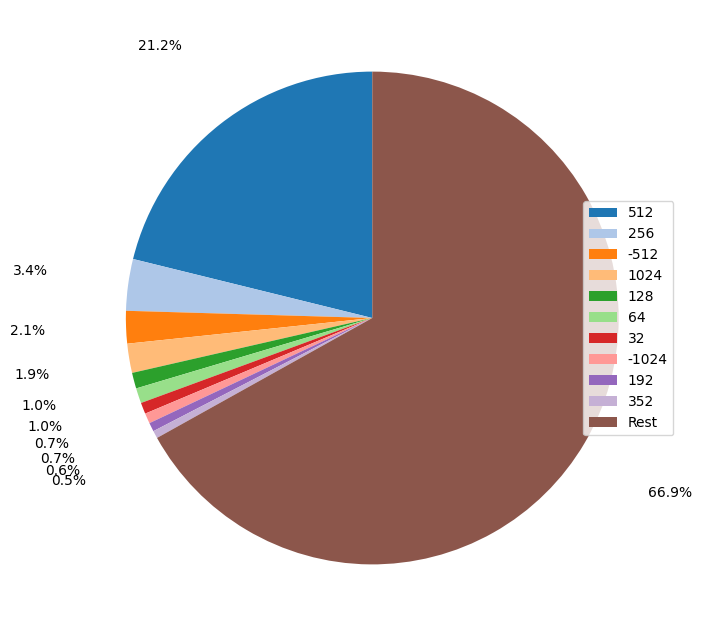

In [42]:
to_show = delta_counts.nlargest(10)
rest = delta_counts.sum() - to_show.sum()

labeldistance = 1.2
fig, ax = plt.subplots(figsize=(10, 8))
labels = list(to_show.index)+['Rest']
ax.pie(
    list(to_show.values)+[rest], 
    autopct='%1.1f%%', 
    labeldistance=labeldistance,
    pctdistance=1.4,
    startangle=90,
    colors=COLORS
)
ax.legend(labels, loc='center right')
plt.show()

In [71]:
def calc_50_mass(series):
    s = series.sort_values(ascending=False)
    cum = s.cumsum()
    t_s = s.sum()
    c_i = (cum <= 0.50*t_s).sum()
    return s.iloc[:c_i].index.unique()

print(f'50% deltas mass: {len(calc_50_mass(delta_counts))}')
print(f'50% address mass: {len(calc_50_mass(address_counts))}')


50% deltas mass: 33537
50% address mass: 154506


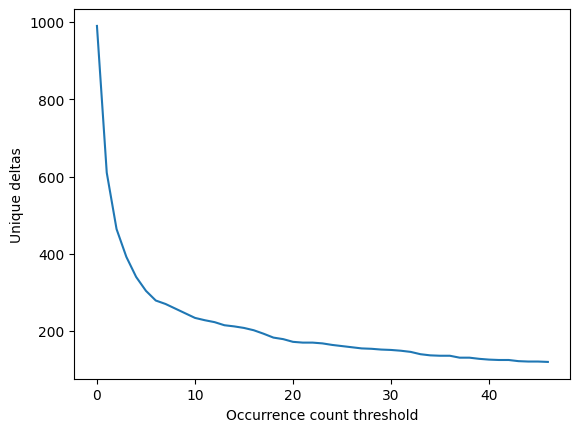

In [43]:
sizes = []
for i in range(3, 50):
    sizes.append(delta_counts[delta_counts >= i].index.to_numpy().shape[0])
    
plt.plot(sizes)
plt.ylabel('Unique deltas')
plt.xlabel('Occurrence count threshold')
plt.show()

In [44]:
vocab_in_th_2 = generate_vocab(
    delta_counts, './vocabs/e_lstm/vocab_in_th_2.json', threshold=2, with_padding=True
)
vocab_in_th_5 = generate_vocab(
    delta_counts, './vocabs/e_lstm/vocab_in_th_5.json', threshold=5, with_padding=True
)
vocab_in_th_10 = generate_vocab(
    delta_counts, './vocabs/e_lstm/vocab_in_th_10.json', threshold=10, with_padding=True
)
vocab_out_percent_10 = generate_vocab(
    delta_counts, './vocabs/e_lstm/vocab_out_percent_10.json', percent=0.1, with_padding=False
)
vocab_out_percent_15 = generate_vocab(
    delta_counts, './vocabs/e_lstm/vocab_out_percent_15.json', percent=0.15, with_padding=False
)
vocab_out_percent_20 = generate_vocab(
    delta_counts, './vocabs/e_lstm/vocab_out_percent_20.json', percent=0.15, with_padding=False
)


print(f"Vocab with 2 occurance threshold size: {len(vocab_in_th_2)}")
print(f"Vocab with 5 occurance threshold size: {len(vocab_in_th_5)}")
print(f"Vocab with 10 occurance threshold size: {len(vocab_in_th_10)}")
print(f"Vocab with top 10% size: {len(vocab_out_percent_10)}")
print(f"Vocab with top 15% size: {len(vocab_out_percent_15)}")
print(f"Vocab with top 20% size: {len(vocab_out_percent_20)}")

Vocab with 2 occurance threshold size: 992
Vocab with 5 occurance threshold size: 394
Vocab with 10 occurance threshold size: 260
Vocab with top 10% size: 24666
Vocab with top 15% size: 36999
Vocab with top 20% size: 36999


In [45]:
train_data, test_data = generate_train_test_data(deltas, './data/e_lstm/train_deltas', './data/e_lstm/test_deltas')

N = 1


100%|██████████| 1717/1717 [00:02<00:00, 838.55it/s]


Top k model accuracy: 20.98%
N = 2


100%|██████████| 1717/1717 [00:01<00:00, 906.36it/s]


Top k model accuracy: 24.74%
N = 3


100%|██████████| 1717/1717 [00:01<00:00, 922.29it/s]


Top k model accuracy: 26.71%
N = 4


100%|██████████| 1717/1717 [00:01<00:00, 910.01it/s]


Top k model accuracy: 28.57%
N = 5


100%|██████████| 1717/1717 [00:01<00:00, 941.95it/s]


Top k model accuracy: 29.71%
N = 6


100%|██████████| 1717/1717 [00:01<00:00, 931.20it/s]


Top k model accuracy: 30.75%
N = 7


100%|██████████| 1717/1717 [00:01<00:00, 929.31it/s]


Top k model accuracy: 31.61%
N = 8


100%|██████████| 1717/1717 [00:01<00:00, 949.27it/s]


Top k model accuracy: 32.21%
N = 9


100%|██████████| 1717/1717 [00:01<00:00, 924.62it/s]


Top k model accuracy: 32.75%
N = 10


100%|██████████| 1717/1717 [00:01<00:00, 909.91it/s]

Top k model accuracy: 33.21%


Text(0, 0.5, 'Evalution accuracy')

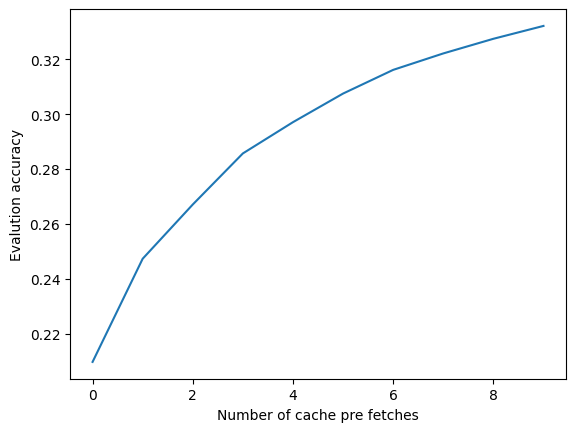

In [46]:
from top_count_model import TopCountModel

test_data = load_deltas('./data/e_lstm/test_deltas')
vocab_out = Vocab.load('./vocabs/e_lstm/vocab_out_percent_10.json')
model = TopCountModel(delta_counts, vocab_out, 1)

n_acc = []
for n in range(1, 11):
    print(f'N = {n}')
    _, acc = evaluate(model, test_data, vocab_out, n=n)
    n_acc.append(float(acc)/100)
    print(f"Top k model accuracy: {acc:.2f}%")
    
plt.plot(n_acc)
plt.xlabel('Number of cache pre fetches')
plt.ylabel('Evalution accuracy')

In [47]:
from embeding_lstm import EmbeddingsLSTM
model = EmbeddingsLSTM.load('./experiments/e_lstm/seq_len_64_vocab_in_th_2_dropout_08_embedding_128_hidden_128/0/model.pt')

  0%|          | 0/144 [00:00<?, ?it/s]

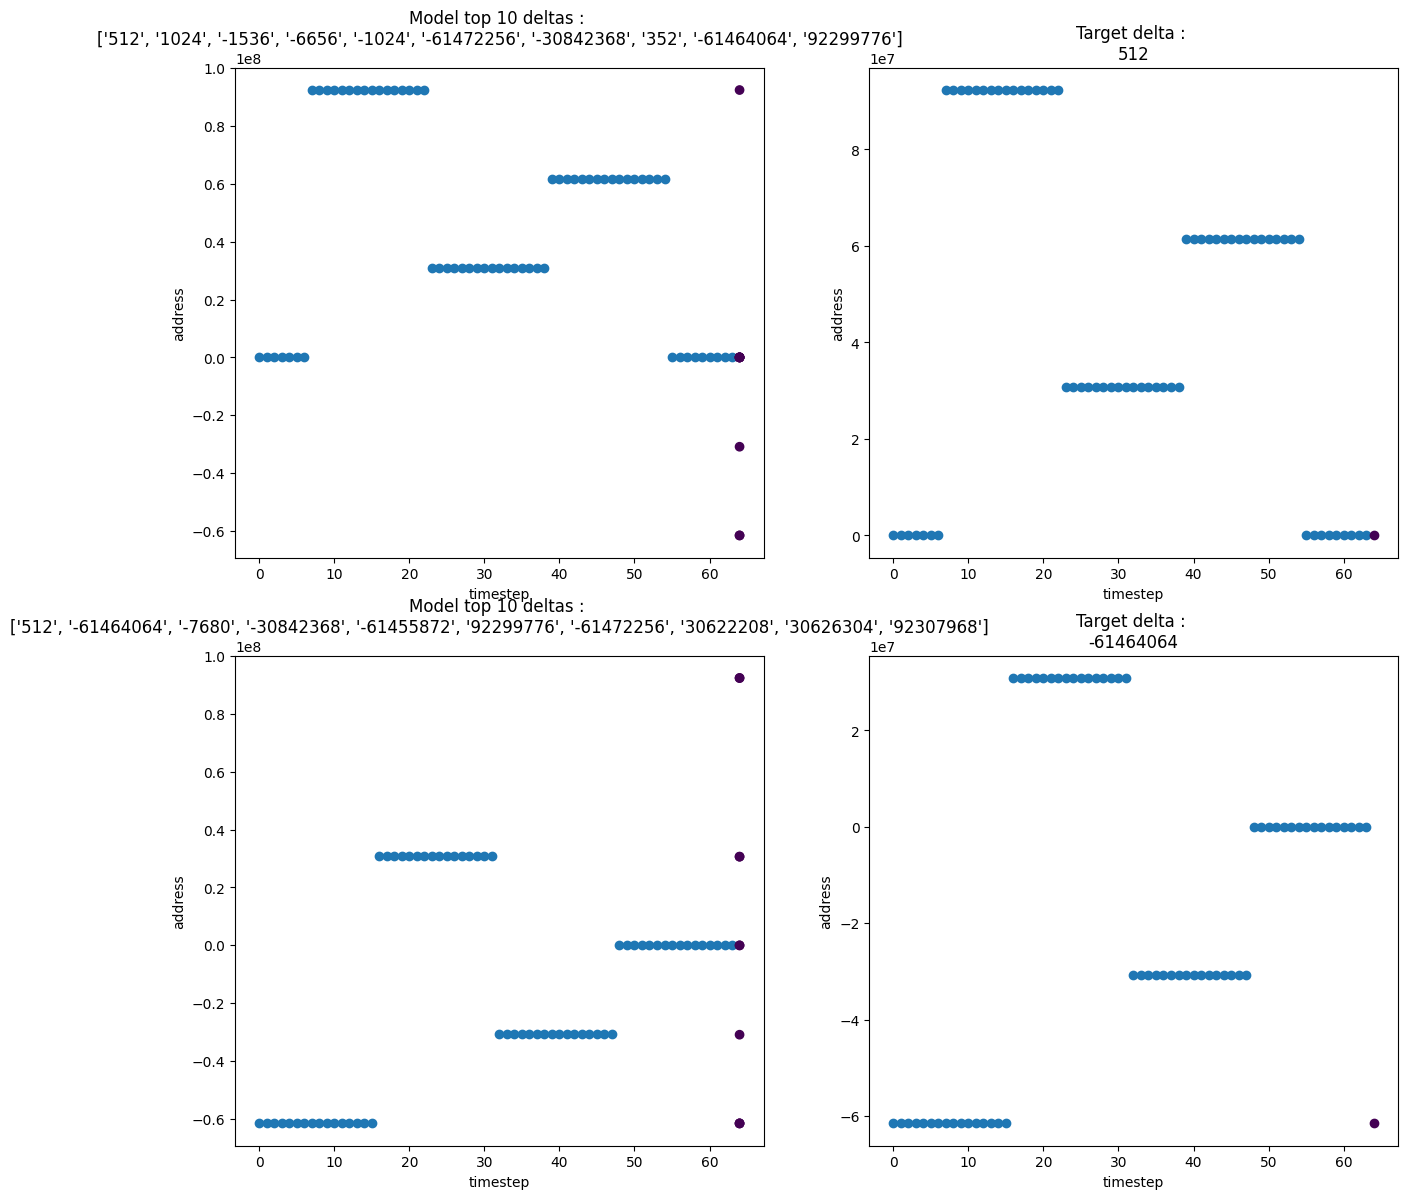

  0%|          | 0/144 [00:00<?, ?it/s]


In [48]:
path = './trace/2lun/cache_trace_348_0_0'
file_deltas = get_deltas(load_cache_trace(path))
      
scatter_data_results([file_deltas], model, model.vocab_out, batches=2)



In [49]:
test_data = load_deltas('./data/e_lstm/test_deltas')

found = []
tops = delta_counts.nlargest(10).index.to_numpy()
for inputs, labels in batch_iter(test_data, 1, shuffle=True, show_progress=True):
    out = model(inputs)
    labels_ = vocab_out.to_tensor(labels).squeeze(dim=1)

    out.data[:,model.vocab_out.word2id[UNK_TOKEN]] = -torch.inf
    _, topk_indices = torch.topk(out, k=n, dim=1)
    is_in_topk = torch.eq(topk_indices, labels_.view(-1, 1))

    if int(labels[0][0]) not in tops and int(labels[0][0])  > 2000 and sum(is_in_topk[0]) > 0:
        found.append((inputs[0], labels[0][0], out[0]))
    if len(found) > 5:
        break

  3%|▎         | 2987/109858 [00:38<22:59, 77.47it/s]


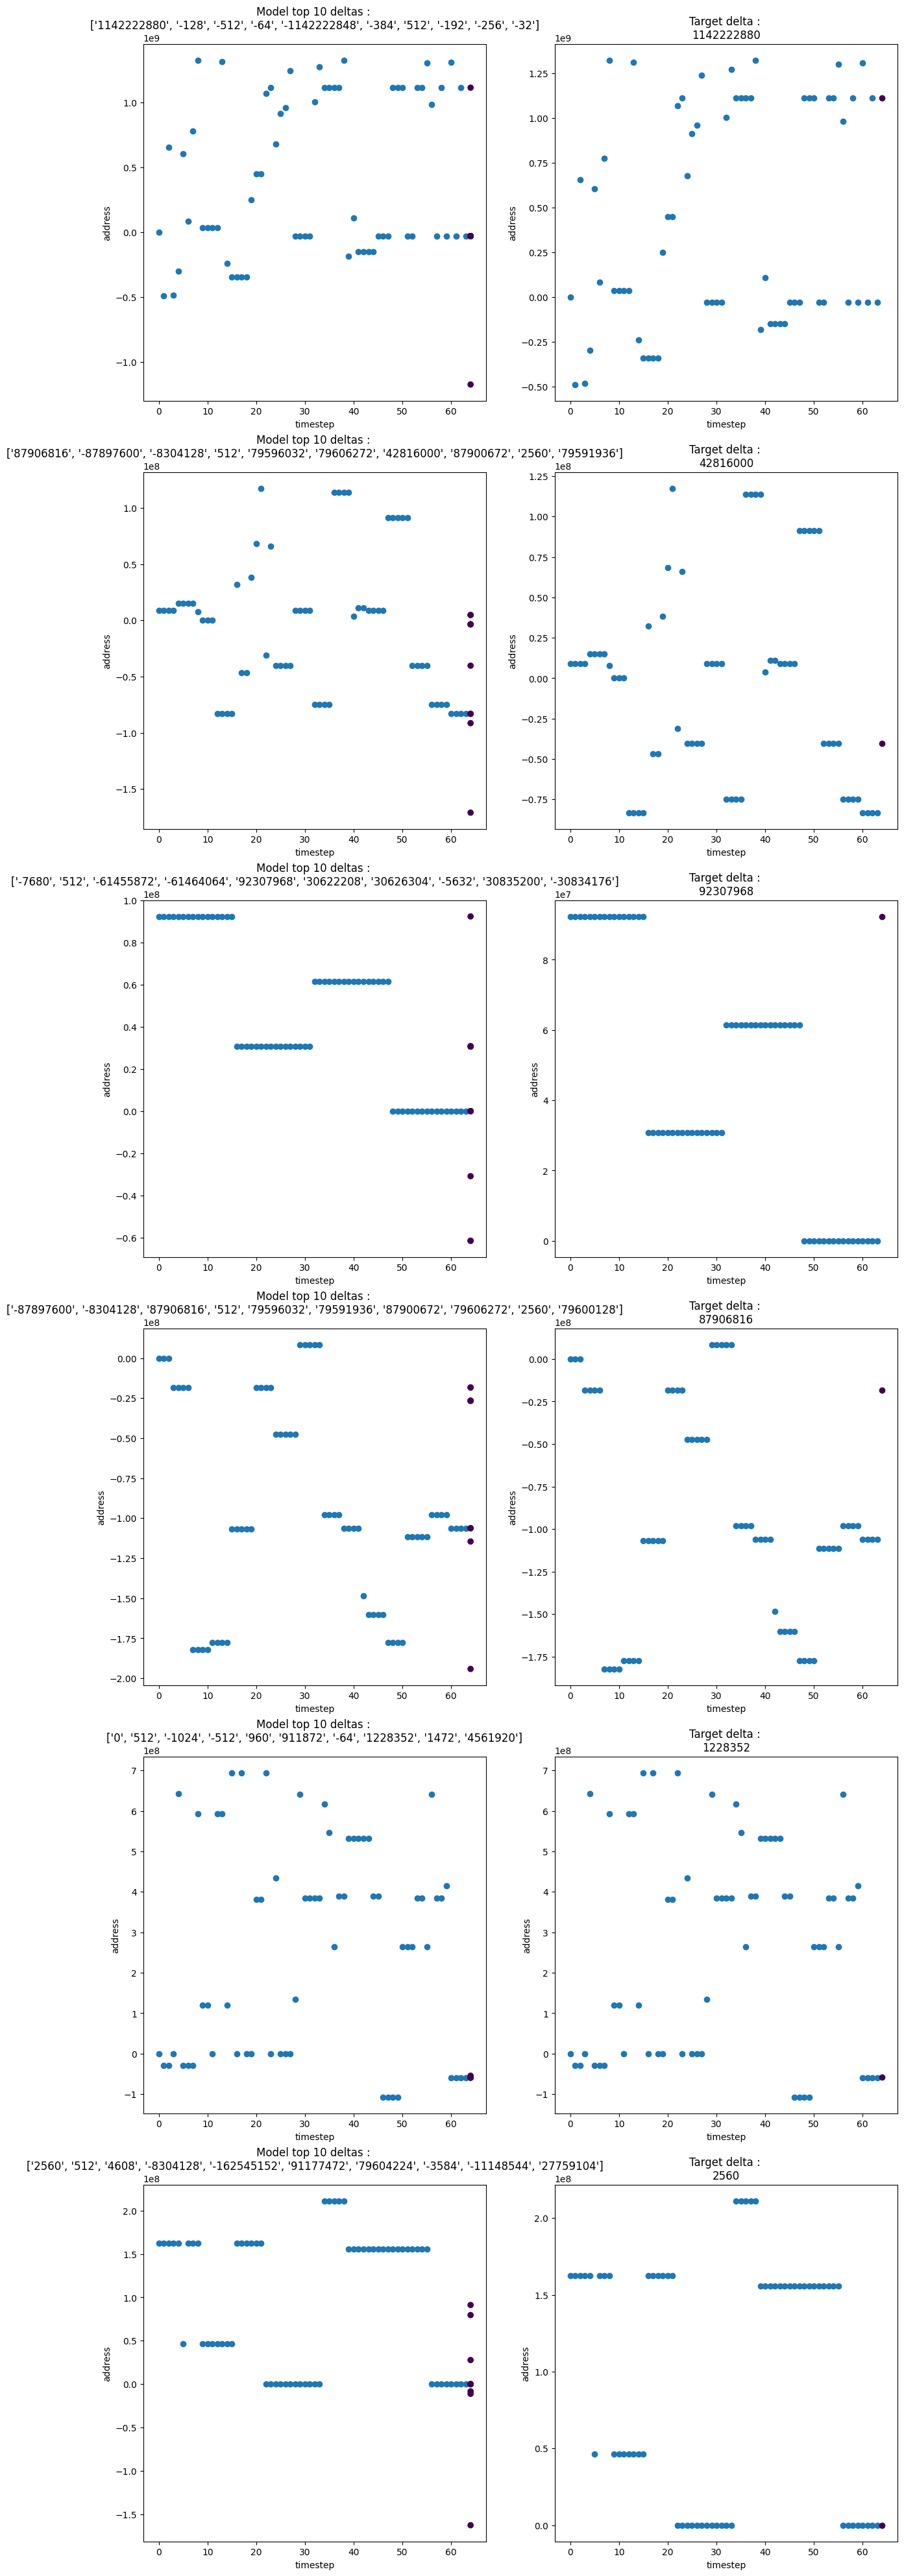

In [50]:

scatter_results(
    [f[0] for f in found], [f[2] for f in found], [[int(f[1])] for f in found], model.vocab_out
)

In [51]:
test_data = load_deltas('./data/e_lstm/test_deltas')

correct_counts = pd.Series([], dtype='int64')
predicted_counts = pd.Series([], dtype='int64')
label_counts = pd.Series([], dtype='int64')

for inputs, labels in batch_iter(test_data, 128, shuffle=True, show_progress=True):
    out = model(inputs)
    labels_ = vocab_out.to_tensor(labels).squeeze(dim=1)

    out.data[:,model.vocab_out.word2id[UNK_TOKEN]] = -torch.inf
    _, topk_indices = torch.topk(out, k=n, dim=1)
    is_in_topk = torch.eq(topk_indices, labels_.view(-1, 1))
    indexes = torch.where(is_in_topk.sum(dim=1) > 0)
    labels = np.array(labels, dtype='int64').squeeze()
    correctly_predicted = labels[indexes]
    label_counts = label_counts.add(pd.value_counts(labels),fill_value=0)
    correct_counts = correct_counts.add(
        pd.value_counts(correctly_predicted), fill_value=0)

100%|██████████| 859/859 [01:16<00:00, 11.23it/s]


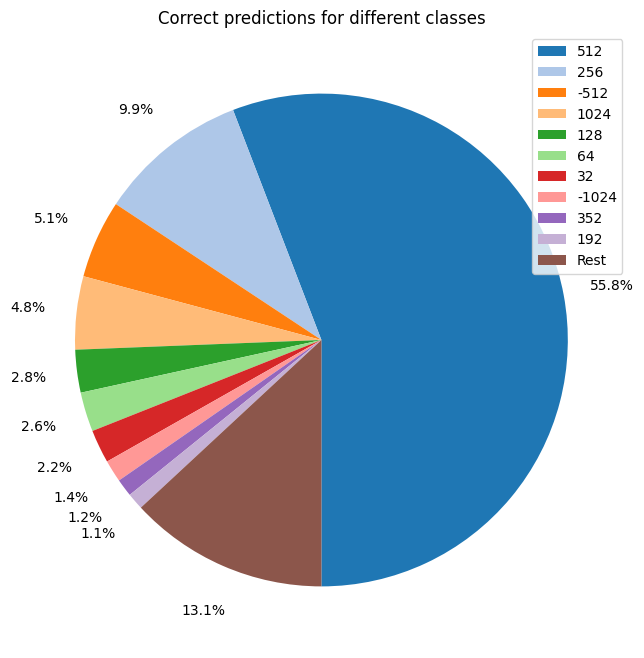

In [52]:
to_show = correct_counts.nlargest(10)
rest = correct_counts.sum() - to_show.sum()

labeldistance = 1.2
fig, ax = plt.subplots(figsize=(10, 8))
labels = list(to_show.index)+['Rest']
ax.pie(
    list(to_show.values)+[rest], 
    autopct='%1.1f%%', 
    labeldistance=labeldistance,
    pctdistance=1.2,
    startangle=270,
    colors=COLORS
)
ax.legend(labels, loc='upper right')
ax.set_title('Correct predictions for different classes')
plt.show()

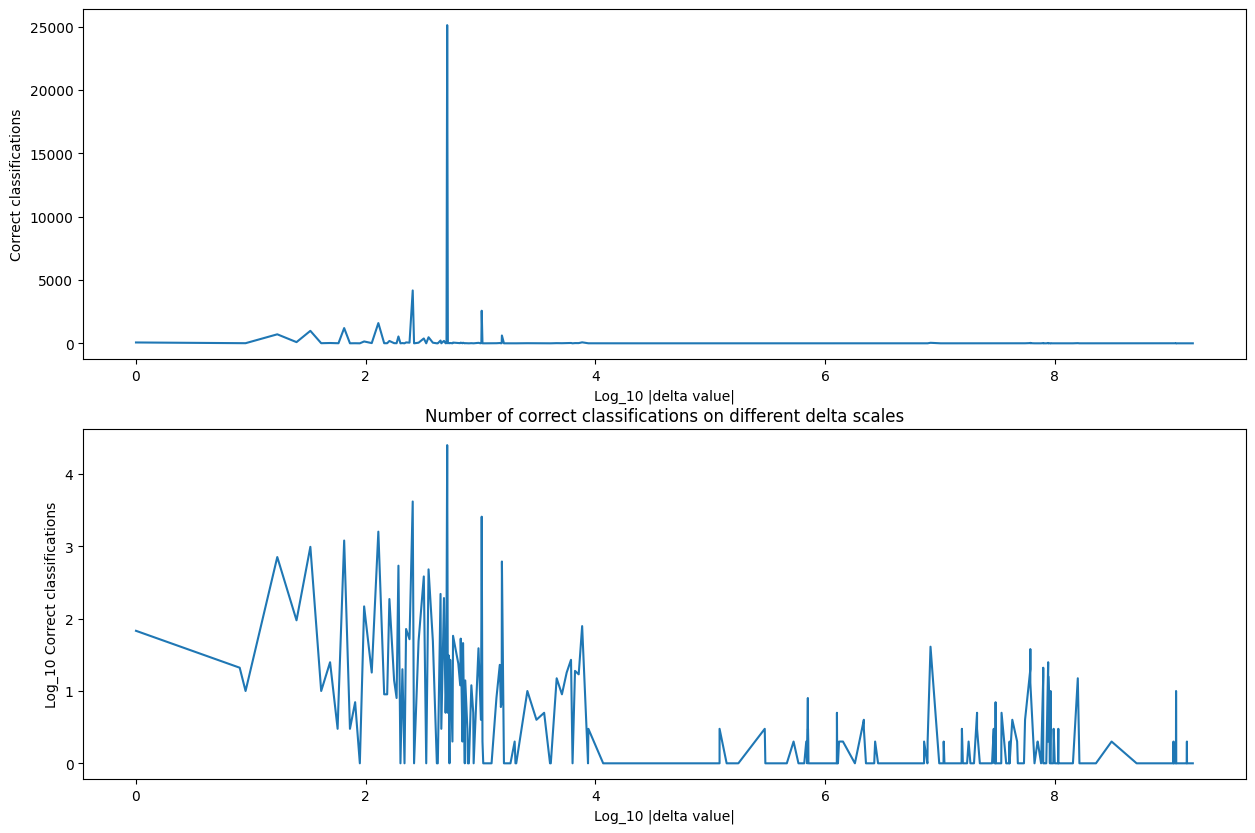

In [53]:
c = correct_counts[correct_counts.index < 0]
c.index = abs(c.index)
absolute_counts = c.sort_index().add(correct_counts[correct_counts.index >= 0], fill_value=0)

_, axs = plt.subplots(nrows=2, figsize=(15, 10))
plt.title('Number of correct classifications on different delta scales')

axs[0].plot(np.log10(absolute_counts.index+1), absolute_counts.values)
axs[0].set_xlabel('Log_10 |delta value|')
axs[0].set_ylabel('Correct classifications')

axs[1].plot(np.log10(absolute_counts.index+1), np.log10(absolute_counts.values))
axs[1].set_xlabel('Log_10 |delta value|')
axs[1].set_ylabel('Log_10 Correct classifications')
plt.show()

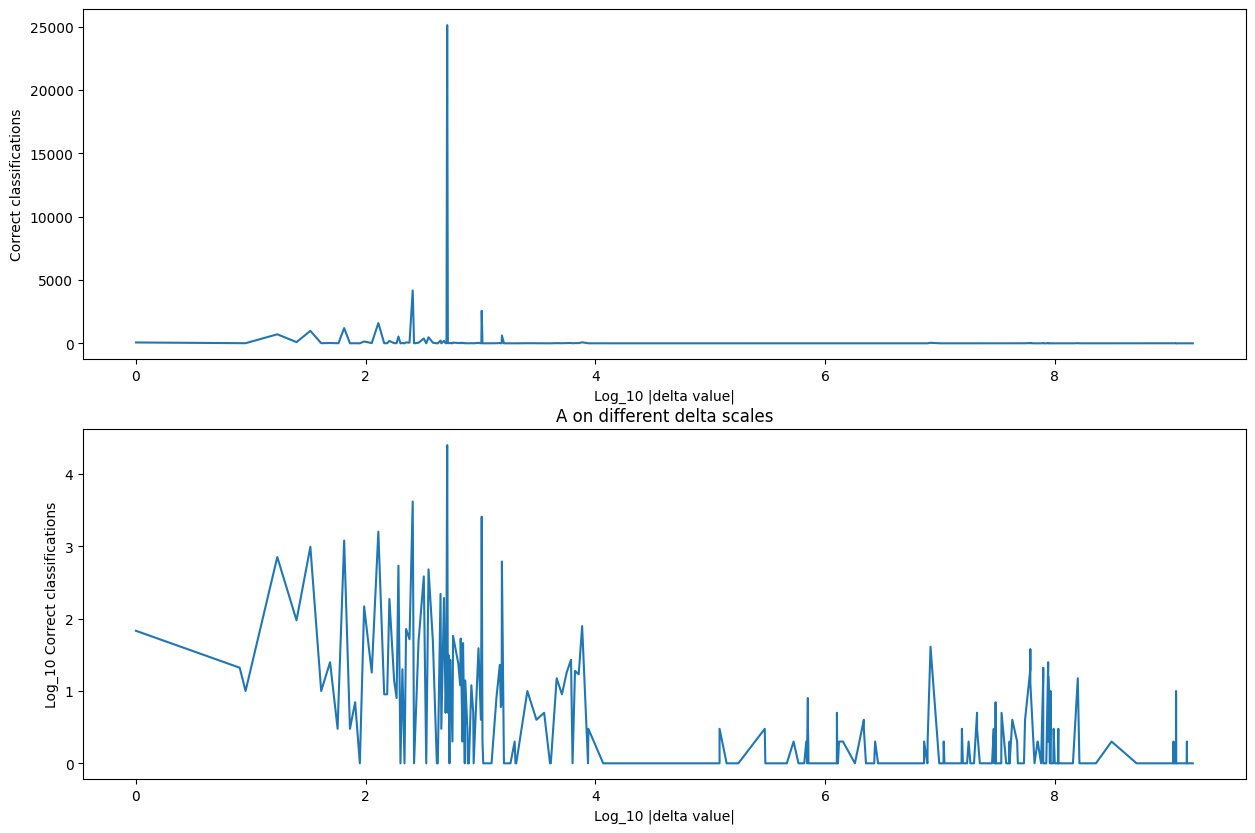

In [54]:
_, axs = plt.subplots(nrows=2, figsize=(15, 10))
plt.title('A on different delta scales')

axs[0].plot(np.log10(absolute_counts.index+1), absolute_counts.values)
axs[0].set_xlabel('Log_10 |delta value|')
axs[0].set_ylabel('Correct classifications')

axs[1].plot(np.log10(absolute_counts.index+1), np.log10(absolute_counts.values))
axs[1].set_xlabel('Log_10 |delta value|')
axs[1].set_ylabel('Log_10 Correct classifications')
plt.show()

In [56]:
recall = len(correct_counts.index) /  len(label_counts.index)

print(recall)

0.008071374453017487
